In [2]:
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
import lz4.frame
from wremnants import plot_tools, theory_corrections,theory_tools
from wremnants import boostHistHelpers as hh
from scipy import special
import uproot

Welcome to JupyROOT 6.27/01


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
with lz4.frame.open("/home/k/kelong/work/WRemnants/w_z_gen_dists.pkl.lz4") as minnlof:
    minnlo = pickle.load(minnlof)

In [4]:
minnlo["ZmumuPostVFP"]["dataset"]["xsec"]

2001.9

In [5]:
minnlohZ = minnlo["ZmumuPostVFP"]["output"]["nominal_gen"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]
minnlohW = (minnlo["WplusmunuPostVFP"]["output"]["nominal_gen"]*minnlo["WplusmunuPostVFP"]["dataset"]["xsec"]+minnlo["WminusmunuPostVFP"]["output"]["nominal_gen"])*minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]/(minnlo["WplusmunuPostVFP"]["weight_sum"]+minnlo["WminusmunuPostVFP"]["weight_sum"])


In [ ]:
minnloZ

In [6]:
scetlibhZ_tot = theory_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z/inclusive_Z.npz", charge=0)
scetlibhZ_A4 = theory_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/inclusive_Z_pT_A4.npz", nonsing=None, flip_y_sign=True, charge=0)
scetlibhZ_nons = theory_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z/inclusive_Z_nons.npz", nonsing=None, charge=0)

In [90]:
scetlibhZ_tot.shape

(1, 10, 40, 1, 1)

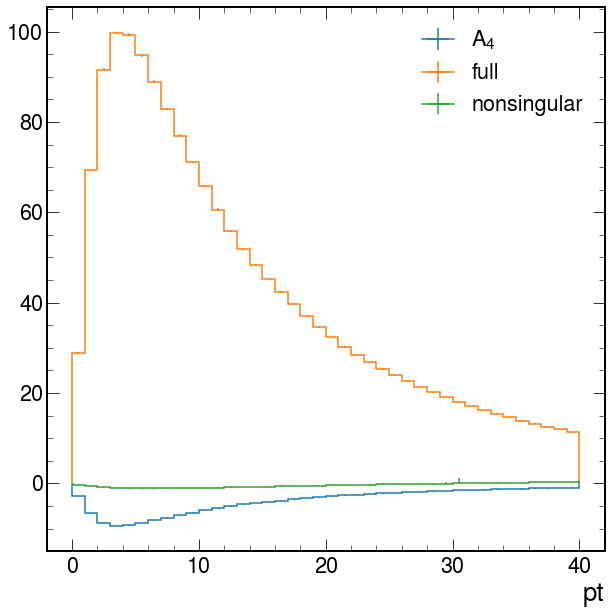

In [8]:
scetlibhZ_A4.project("pt").plot(label="A$_{4}$")
scetlibhZ_tot.project("pt").plot(label="full")
scetlibhZ_nons.project("pt").plot(label="nonsingular")
plt.legend()

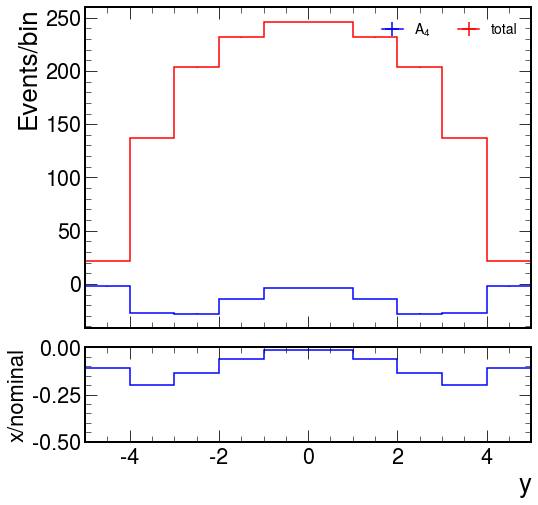

In [9]:
fig = plot_tools.makePlotWithRatioToRef([scetlibhZ_tot.project("y"), scetlibhZ_A4.project("y")], xlim=[-5, 5],colors=["red", "blue",], labels=["total", "A$_{4}$"], rrange=[-0.5, 0], binwnorm=1.)

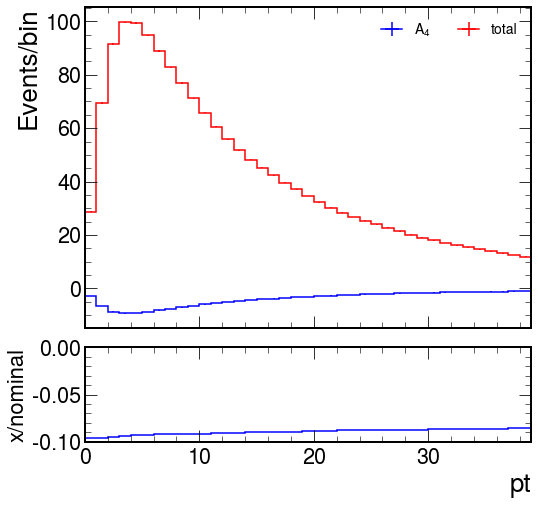

In [96]:
fig = plot_tools.makePlotWithRatioToRef([scetlibhZ_tot.project("pt"), scetlibhZ_A4.project("pt")],colors=["red", "blue",], labels=["total", "A$_{4}$"], rrange=[-0.1, 0], binwnorm=1.)

In [7]:
scetlibh = hh.makeAbsHist(scetlibhZ_tot, "y")

In [41]:
matrixRadish = theory_corrections.read_matrixRadish_hist("/home/k/kelong/MATRIX+RadISH/RadISH_observable_binning2__NNLO+N3LL.dat")

In [32]:
dyturbo = theory_corrections.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt", "z-cms-wmass-n3lonnll_ctres_2.txt", "z-cms-wmass-n3lonnll_vj_2.txt"], "/home/k/kelong/work/Generators/DYTurboResults/", )

In [42]:
s = hist.tag.Slicer()
minnlo_rebin, matrix_rad_rebin, dyturbo_rebin, scetlib_rebin = hh.rebinHistsToCommon([minnlohZ[{"massVgen": s[0:minnlohZ.axes["massVgen"].size:hist.sum]}].project("ptVgen"), matrixRadish, dyturbo, scetlibh.project('pt')], 0, True)


/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


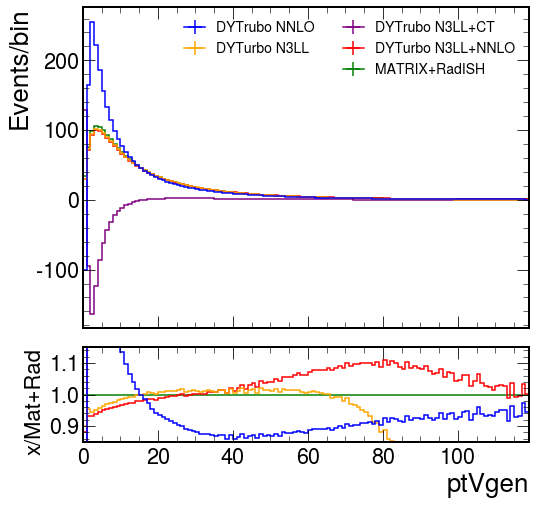

In [76]:
dyturbo_all = theory_corrections.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt", "z-cms-wmass-n3lonnll_ctres_2.txt", "z-cms-wmass-n3lonnll_vj_2.txt"], "/home/k/kelong/work/Generators/DYTurboResults/")
dyturbo_resum = theory_corrections.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt", "z-cms-wmass-n3lonnll_ctres_2.txt",], "/home/k/kelong/work/Generators/DYTurboResults/")
dyturbo_resumOnly = theory_corrections.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt",], "/home/k/kelong/work/Generators/DYTurboResults/")
dyturbo_fo = theory_corrections.read_dyturbo_hist(["z-cms-wmass-n3lonnll_vj_2.txt"], "/home/k/kelong/work/Generators/DYTurboResults/")


fig = plot_tools.makePlotWithRatioToRef([matrix_rad_rebin, dyturbo_all, dyturbo_resum, dyturbo_resumOnly, dyturbo_fo, ],colors=["green", "red", "purple", "orange", "blue",], labels=["MATRIX+RadISH", "DYTurbo N3LL+NNLO", "DYTrubo N3LL+CT", "DYTurbo N3LL", "DYTrubo NNLO", ], rrange=[0.85, 1.15], binwnorm=1., rlabel="x/Mat+Rad")

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


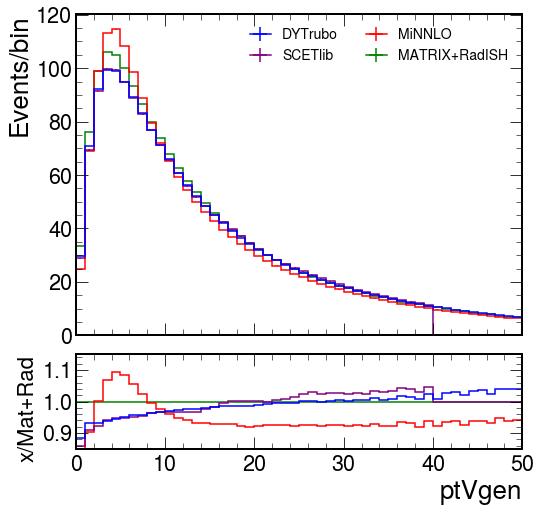

In [46]:
fig = plot_tools.makePlotWithRatioToRef([matrix_rad_rebin, minnlo_rebin, scetlib_rebin, dyturbo_rebin],colors=["green", "red", "purple", "blue", ], labels=["MATRIX+RadISH", "MiNNLO", "SCETlib", "DYTrubo", ], rrange=[0.85, 1.15], xlim=[0, 50], binwnorm=1., rlabel="x/Mat+Rad")

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


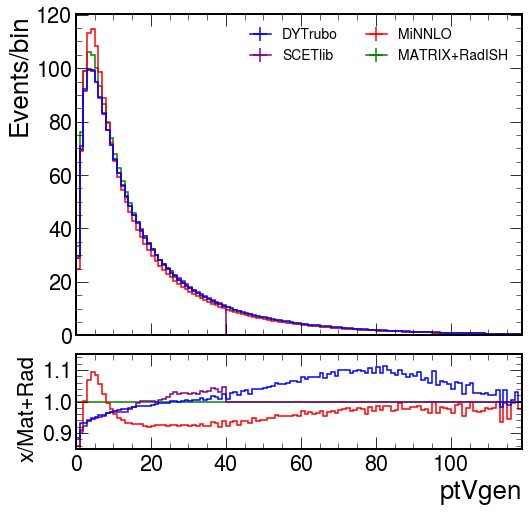

In [45]:
fig = plot_tools.makePlotWithRatioToRef([matrix_rad_rebin, minnlo_rebin, scetlib_rebin, dyturbo],colors=["green", "red", "purple", "blue", ], labels=["MATRIX+RadISH", "MiNNLO", "SCETlib", "DYTrubo", ], rrange=[0.85, 1.15], binwnorm=1., rlabel="x/Mat+Rad")

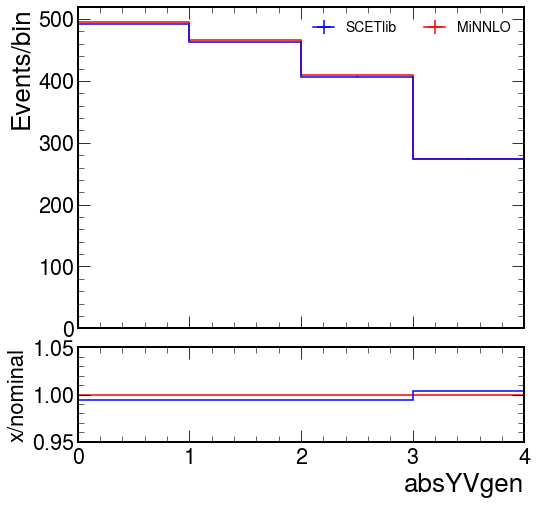

In [44]:
fig = plot_tools.makePlotWithRatioToRef([minnlo_rebin.project("absYVgen"), scetlibh.project("absy")],colors=["red", "blue",], labels=["MiNNLO", "SCETlib"], rrange=[0.95, 1.05], binwnorm=1.)


In [ ]:
x = corr[20.j:40.j].axes["ptVgen"].centers
params = np.polyfit(y=corr[20.j:40.j].values(), x=x, deg = 2)
poly = np.poly1d(params)
xeval = corr[30.j:40.j].axes["ptVgen"].centers

In [ ]:
corr_orig = corr.copy()
corr[30:40] = np.stack((poly(xeval), corr[30.j:40.j].variances()), axis=-1)

In [ ]:
minnloScetlib = hh.multiplyHists(minnlocorr, corrW)
minnloScetlib.plot()
matrixRadish.plot()

In [10]:
scetlibh_tot = scetlib_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm.npz")
scetlibh_A4 = scetlib_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_A4.npz", flip_y_sign=True)
scetlibh_tot_s = scetlib_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm.npz", nonsing="")
scetlibh_tot.shape

(1, 40, 40, 1)

In [11]:
scetlib_A4_coeff = hh.divideHists(scetlibh_A4, scetlibh_tot, cutoff=0.0001)
scetlib_A4_coeff_pt = hh.divideHists(scetlibh_A4.project("pt"), scetlibh_tot.project("pt"), cutoff=0.0001)
scetlib_A4_coeff_y = hh.divideHists(scetlibh_A4.project("y"), scetlibh_tot.project("y"), cutoff=0.0001)

In [362]:
#scetlibW_y_tot = scetlib_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo.npz", add_nonsing=True)
#scetlibW_y_A4 = scetlib_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo_A4.npz", add_nonsing=True, flip_y_sign=True)

In [12]:
scetlibW_A4 = hh.makeAbsHist(scetlibh_A4, "y")
scetlibW_tot = hh.makeAbsHist(scetlibh_tot, "y")

In [13]:
scetlib_absy_A4_coeff = hh.divideHists(scetlibW_A4.project("absy"), scetlibW_tot.project("absy"))

Text(0.5, 1.0, 'SCETlib structure functions')

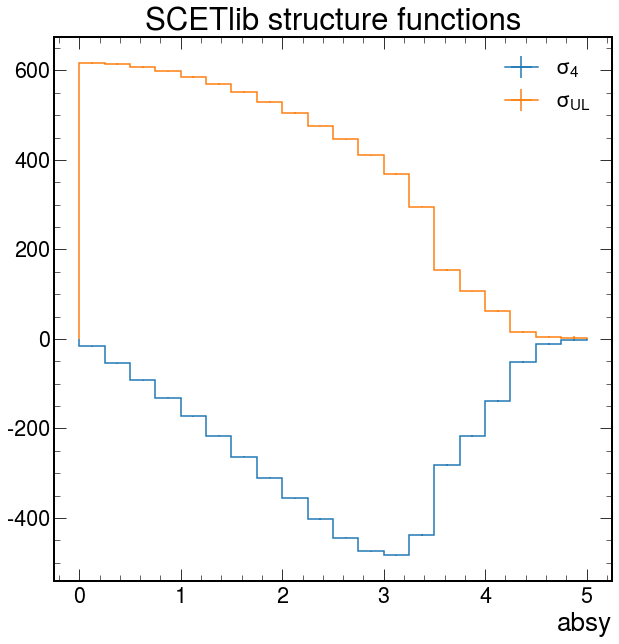

In [17]:
scetlibW_A4.project("absy").plot(label="$\sigma_{4}$")
scetlibW_tot.project("absy").plot(label="$\sigma_{UL}$")
plt.legend()
plt.title("SCETlib structure functions")

In [106]:
minnloZhel = minnlo["ZmumuPostVFP"]["output"]["helicity_moments_scale"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]
minnloWmhel = minnlo["WminusmunuPostVFP"]["output"]["helicity_moments_scale"]*minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]/minnlo["WminusmunuPostVFP"]["weight_sum"]
minnloWm = minnlo["WminusmunuPostVFP"]["output"]["nominal_gen"]*minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]/minnlo["WminusmunuPostVFP"]["weight_sum"]

minnloWhel_cen = minnloWmhel[{"muRfact" : 1.j, "muFfact" : 1.j}]

In [108]:
minnloWhel_cen[{"helicity" : -1.j}].sum()

WeightedSum(value=8641.12, variance=0.47286)

In [76]:
minnlohW[{"chargeVgen" : -1.j}].sum(flow=True)

WeightedSum(value=3719.95, variance=0.0869161)

In [101]:
minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]

8703.87

In [99]:
minnloWmhel[{"helicity" : -1.j}].sum(flow=True)

WeightedSum(value=78074.3, variance=6.1859)

In [109]:
hists = hh.rebinHistsToCommon([minnloWmhel[{"muRfact" : 1.j, "muFfact" : 1.j}], scetlibW_A4, scetlibW_tot], 2, False)
minnlohel_rebin, scetlibW_A4_rebin, scetlibW_tot_rebin = hh.rebinHistsToCommon(hists, 1, False)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3731a5c400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

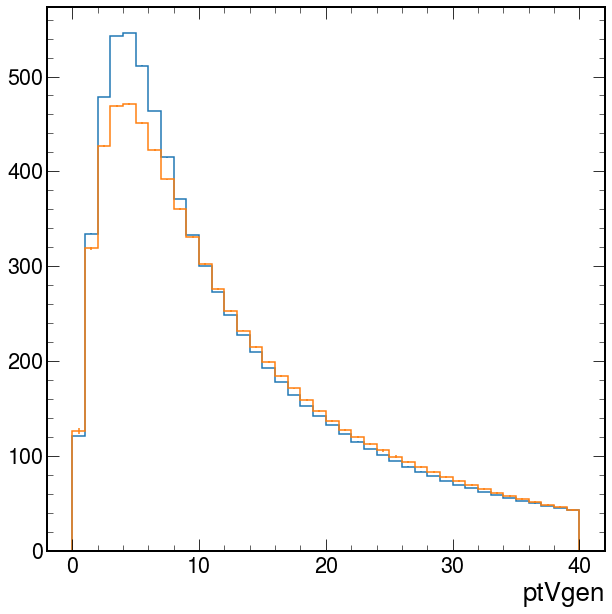

In [111]:
minnlohel_rebin[{"helicity" : -1.j}].project("ptVgen").plot()
scetlibW_tot_rebin.project("pt").plot()

In [112]:
minnlohel_scaled = theory_tools.scale_angular_moments(minnlohel_rebin)

In [113]:
print(minnlohel_rebin[{"helicity" : 4.j}].sum())
print(minnlohel_scaled[{"helicity" : -1.j}].sum())
print(scetlibW_tot_rebin.sum())

WeightedSum(value=-1177.92, variance=0.169198)
WeightedSum(value=7753.84, variance=0.431197)
WeightedSum(value=7518.07, variance=54.1536)


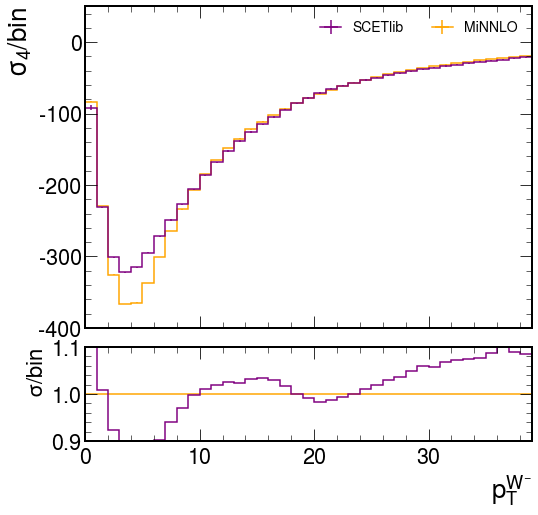

In [144]:
hists_to_plot = [minnlohel_scaled[{"helicity" : 4.j}].project("ptVgen"), scetlibW_A4_rebin.project("pt")]
fig = plot_tools.makePlotWithRatioToRef(hists_to_plot, colors=["orange", "purple",], ylim=[-400, 50], ylabel="$\sigma_{4}$/bin", xlabel=r"p$_{\mathrm{T}}^{\mathrm{W}^{-}}$", labels=["MiNNLO", "SCETlib"], rlabel="$\sigma$/bin", rrange=[0.9, 1.1], binwnorm=1.)


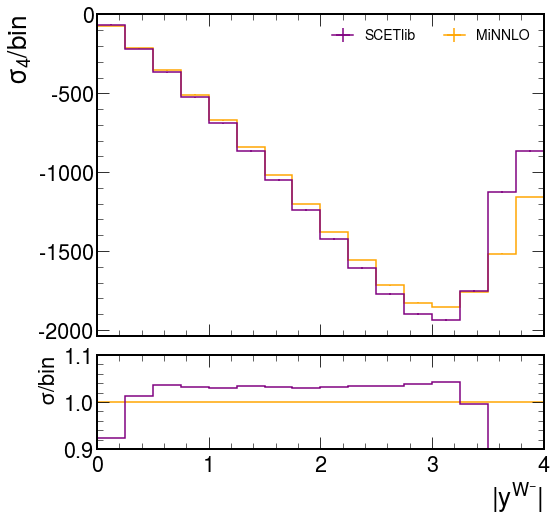

In [154]:
hists_to_plot = [minnlohel_scaled[{"helicity" : 4.j}].project("absYVgen"), scetlibW_A4_rebin.project("absy")]
fig = plot_tools.makePlotWithRatioToRef(hists_to_plot, colors=["orange", "purple",], ylabel="$\sigma_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rlabel="$\sigma$/bin", rrange=[0.9, 1.1], binwnorm=1.)


WeightedSum(value=14.0745, variance=304)


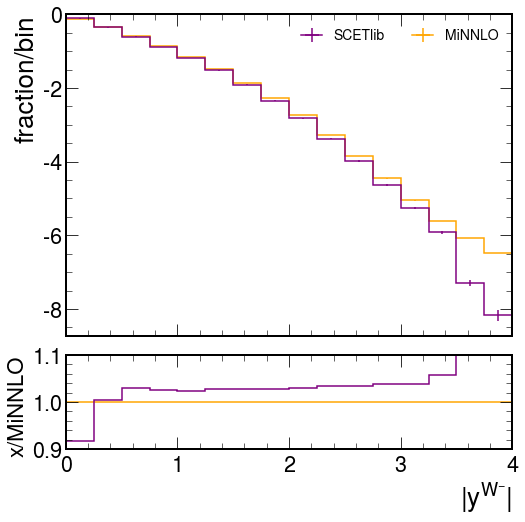

In [196]:
minnlo_coeffs = theory_tools.moments_to_angular_coeffs(minnlohel_rebin.project("absYVgen", "helicity"))
scetlib_A4_coeff = hh.divideHists(scetlibW_A4_rebin.project("absy"), scetlibW_tot_rebin.project("absy"))
coeff_hists_to_plot = [minnlo_coeffs[{"helicity" : 4.j}].project("absYVgen"), scetlib_A4_coeff.project("absy")]
fig = plot_tools.makePlotWithRatioToRef(coeff_hists_to_plot, colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="fraction/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

In [267]:
scetlibZ_A4 = scetlib_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z/inclusive_Z_pT_A4.npz", nonsing="", flip_y_sign=True)
scetlibZ_tot = scetlib_corrections.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z/inclusive_Z_pT.npz", nonsing="")
scetlibZ_A4 = hh.makeAbsHist(scetlibZ_A4, "y")
scetlibZ_tot = hh.makeAbsHist(scetlibZ_tot, "y")

In [277]:
minnlohelZ = minnlo["ZmumuPostVFP"]["output"]["helicity_moments_scale"][{"muRfact" : 1.j, "muFfact" : 1.j}]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]

In [279]:
print(minnlohelZ_scaled[{"helicity" : 4.j}].sum(flow=True))
print(minnlohelZ[{"helicity" : 4.j}].sum(flow=True))

WeightedSum(value=-88.4544, variance=0.360648)
WeightedSum(value=-22.1136, variance=0.0225405)


In [280]:
minnlohelZ_coeffs_pt = theory_tools.moments_to_angular_coeffs(minnlohelZ.project("ptVgen", "helicity"))

WeightedSum(value=215.8, variance=1952.12)


In [294]:
scetlibZ_A4, minnlohelZ = hh.rebinHistsToCommon([scetlibZ_A4, minnlohelZ], 1)
minnlohelZ_scaled = theory_tools.scale_angular_moments(minnlohelZ)
minnlohelZ_A4_scaled = minnlohelZ_scaled[{"helicity" : 4.j}]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3725526290>, errorbar=None, legend_artist=None)]

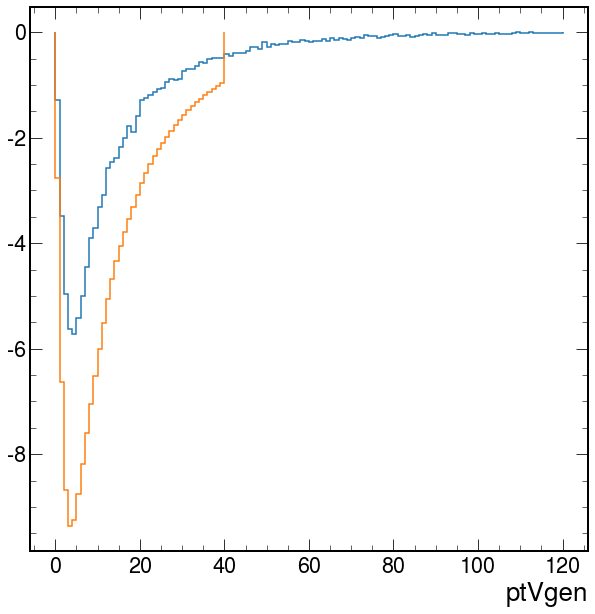

In [295]:
minnlohelZ_A4_scaled.project("ptVgen").plot(yerr=False)
scetlibZ_A4.project("pt").plot(yerr=False)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f37248b08b0>, errorbar=None, legend_artist=None)]

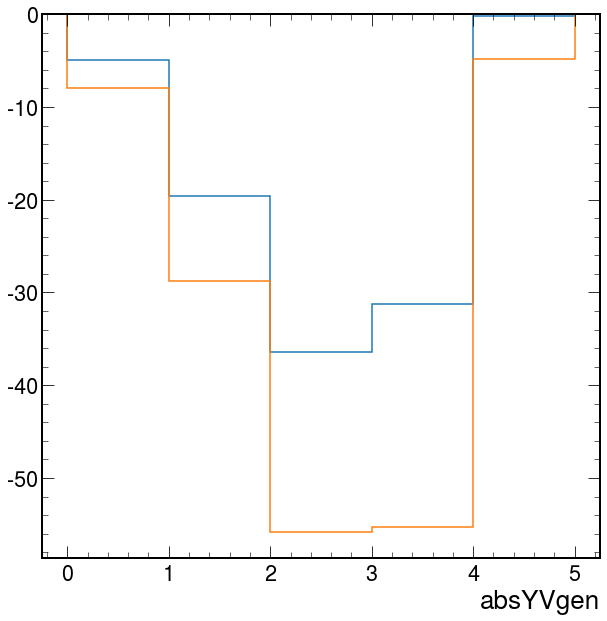

In [296]:
minnlohelZ_scaled[{"helicity" : 4.j}].project("absYVgen").plot(yerr=False)
scetlibZ_A4.project("absy").plot(yerr=False)

In [299]:
scetlibZ_a4_coeff_y = scetlib_corrections.make_a4_coeff(scetlibZ_A4.project("absy"), scetlibZ_tot.project("absy"))
minnlohelZ_coeffs_y = theory_tools.moments_to_angular_coeffs(minnlohelZ.project("absYVgen", "helicity"))

WeightedSum(value=13.4694, variance=112)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f372497f100>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

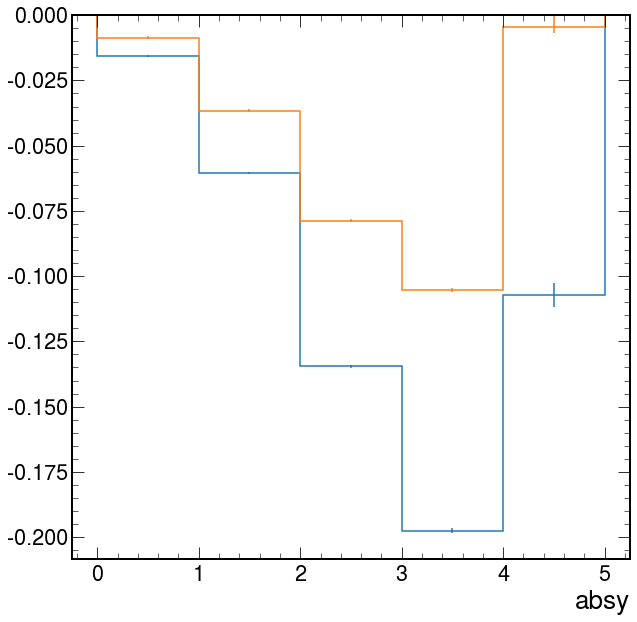

In [300]:
scetlibZ_a4_coeff_y.plot()
minnlohelZ_coeffs_y[{"helicity" : 4.j}].plot()

In [ ]:
scetlibZ_a4_coeff = scetlib_corrections.make_a4_coeff(scetlibZ_A4.project("pt"), scetlibZ_tot.project("pt"))


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f372426a890>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

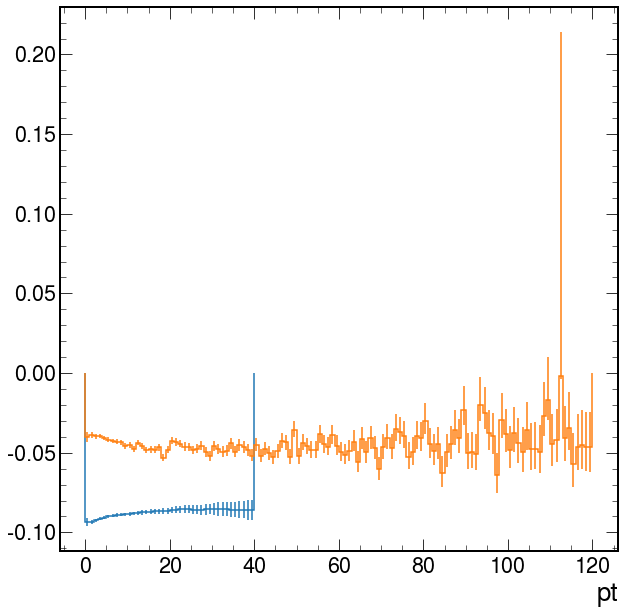

In [258]:
scetlibZ_a4_coeff.project("pt").plot()
minnlohelZ_coeffs_pt[{"helicity" : 4.j}].plot()

In [61]:
for i in range(8):
    minnlohelZ_all[{"helicity" : i}].project("ptVgen").plot(label=f"$\sigma_{{{i-1}}}$")

plt.legend()
plt.title("Z structure functions")

NameError: name 'minnlohelZ_all' is not defined

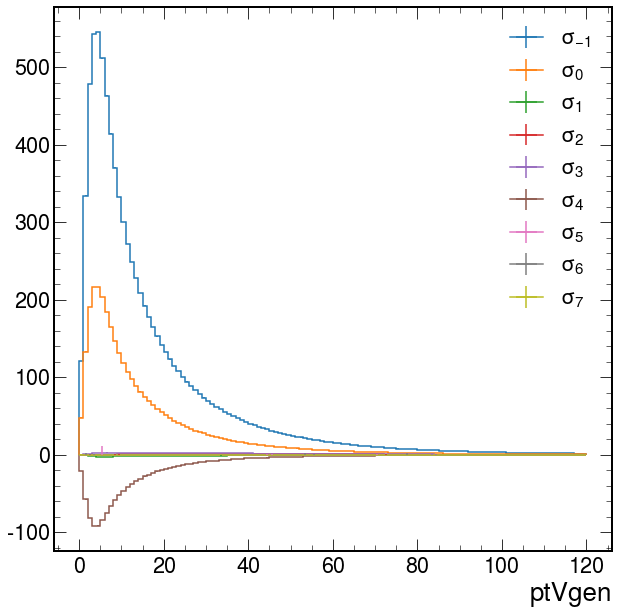

In [36]:
for i in range(-1, 8):
    minnlohel[{"helicity" : i+1}].project("ptVgen").plot(label=f"$\sigma_{{{i}}}$")

plt.legend()

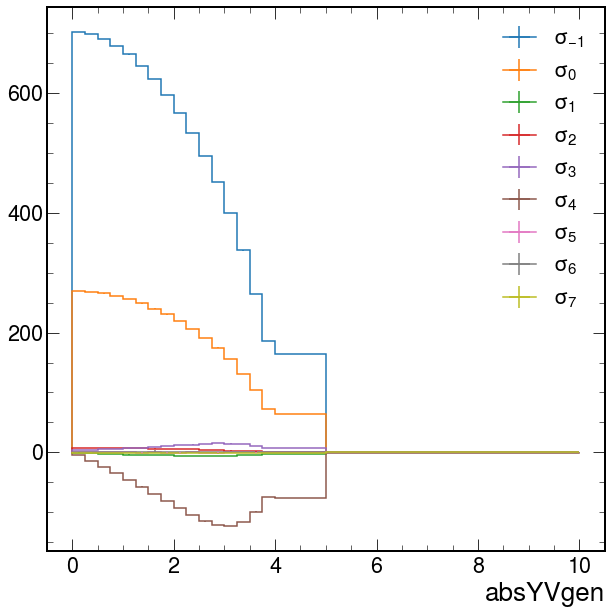

In [37]:
for i in range(-1, 8):
    minnlohel[{"helicity" : i+1}].project("absYVgen").plot(label=f"$\sigma_{{{i}}}$")

plt.legend()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9e7eb6e140>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

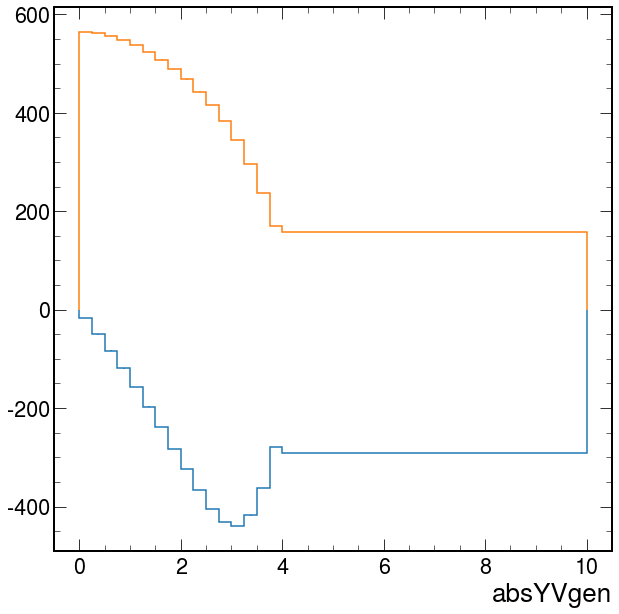

In [453]:
(hists[0][{"helicity" : 4.j}].project("absYVgen")*4).plot()
hists[0][{"helicity" : -1.j}].project("absYVgen").plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9e7ef3a8c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

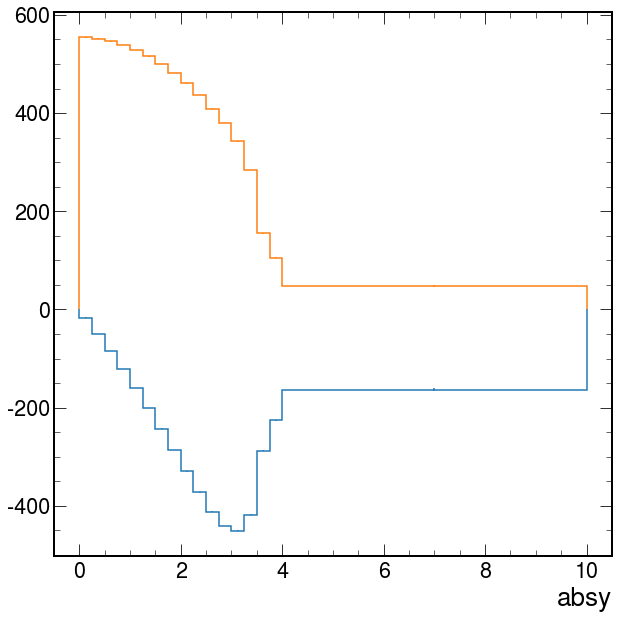

In [448]:
hists[1].project("absy").plot()
hists[2].project("absy").plot()

In [456]:
a4hists = [(hists[0][{"helicity" : 4.j}].project("absYVgen")*4), hists[1].project("absy")]

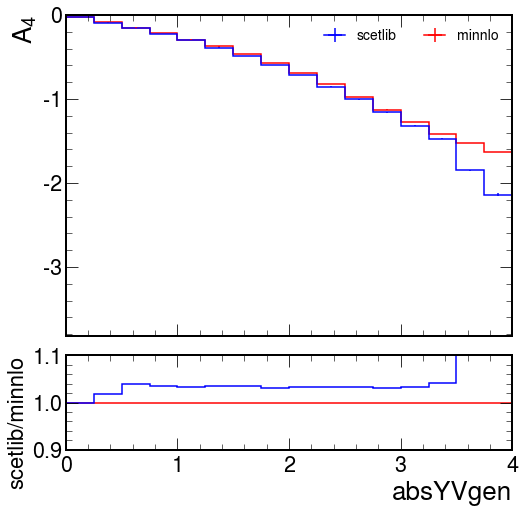

In [411]:
fig = plot_tools.makePlotWithRatioToRef([minnloCoeffs[{"helicity" : 4.j}], scetlib_absy_A4_coeff], colors=["red", "blue"], labels=["minnlo", "scetlib"], ylabel="A$_{4}$", rrange=[0.9, 1.1], rlabel="scetlib/minnlo")

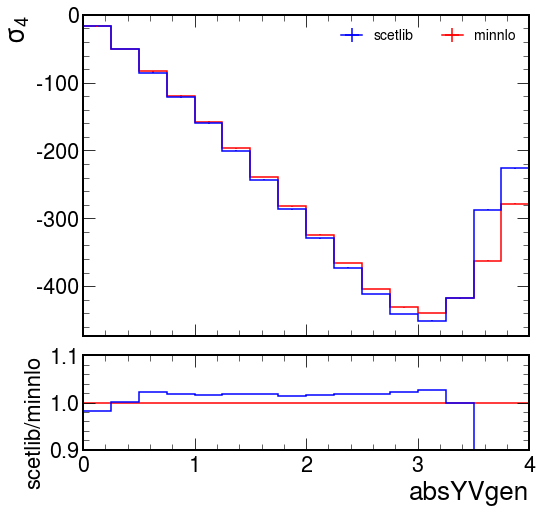

In [460]:
fig = plot_tools.makePlotWithRatioToRef(a4hists, colors=["red", "blue"], labels=["minnlo", "scetlib"], ylabel="$\sigma_{4}$", rrange=[0.9, 1.1], rlabel="scetlib/minnlo")

In [353]:
scetlib_absy_A4_coeff = hh.divideHists(hists[1].project("pt"), hists[2].project("pt"))
minnloCoeffs = theory_tools.moments_to_angular_coeffs(hists[0].project("ptVgen", "helicity"))

ValueError: The axis name ptVgen could not be found

ERROR! Session/line number was not unique in database. History logging moved to new session 1320


In [ ]:
import uproot

In [ ]:
matrixRadish.plot()
minnloh.project("ptVgen").plot()

In [ ]:
f = uproot.open("/eos/user/k/kelong/HistFiles/ZGen/ZToMuMu_MATRIX_RadISH_MatchEWParams_NNPDF31.root")

In [ ]:
f["DYm50_matrix__radish/ptZ_lhe_mm"].to_hist().plot()
minnlohZ.project("ptVgen").plot()

In [ ]:
dyturbof = np.load("/eos/user/k/kelong/HistFiles/WGen/DYTurbo/wm-13tev-cms-n3ll.npz")

In [ ]:
ptax = hist.axis.Variable(dyturbof["bins"], name="pt")
dyturboh = hist.Hist(ptax, storage=hist.storage.Weight())
dyturboh[...] = np.stack((dyturbof["hist"], dyturbof["err"]), axis=-1)

In [ ]:
dyturboMatch = matrixRadish.copy()
dyturboMatch[:40] = dyturboh.view()/1000

In [ ]:
dyturboMatch

In [ ]:
scetlibMatch = matrixRadish.copy()
scetlibMatch[:40] = scetlibh_tot.project("pt").view()

In [ ]:
minnloZbug

In [ ]:
fig = plot_tools.makePlotWithRatioToRef([f["DYm50_matrix__radish/ptZ_lhe_mm"].to_hist(), minnlohZ.project("ptVgen")], colors=["blue", "green", ], labels=["MATRIX+RadISH (NNLO+N$^{3}$LL)", "MiNNLO (H$^{(2)}$ sign error)",], rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNLO+N$^{3}$LL", nlegcols=1)


In [ ]:
scetlibMatch.sum()

In [ ]:
minnlohW.sum()

In [ ]:
fig = plot_tools.makePlotWithRatioToRef([matrixRadish, minnloScetlib, minnlohW.project("ptVgen"), dyturboMatch, scetlibMatch],colors=["green", "orange", "blue", "red", "purple"], labels=["MATRIX+RadISH (NNLO+N$^{3}$LL)", "MiNNLO+SCETlib (NNLO+PS + N$^{3}$LL corr.)", "MiNNLO (NNLO+PS)", "DYTurbo (N$^{3}$LL)", "SCETlib (N$^{3}$LL)"], rrange=[0.9, 1.1], binwnorm=1., nlegcols=1, rlabel="x/Matrix+Rad", ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{W}^{-}}$ (GeV)")

#fig = plot_tools.makePlotWithRatioToRef([matrixRadish, minnloh.project("ptVgen"), dyturboMatch, scetlibMatch],colors=["green", "blue", "red", "purple"], labels=["MATRIX+RadISH (NNLO+N$^{3}$LL)", "MiNNLO (NNLO+PS)", "DYTurbo (N$^{3}$LL)", "SCETlib (N$^{3}$LL)"], rrange=[0.9, 1.1], binwnorm=1., nlegcols=1, rlabel="x/Matrix+Rad", ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{W}^{-}}$ (GeV)")



In [49]:
ls ..

combineResults/                  README.md           temp.txt
lowpu/                           ResultsOldSamples/  test/
mw_with_mu_eta_pt.pkl.lz4        scripts/            test.root
mz_wlike_with_mu_eta_pt.pkl.lz4  setup.sh            wremnants/
narf/                            temp/               w_z_gen_dists.pkl.lz4
notebooks/                       tempLowPU/
rdfCorrections/                  temp.py


In [188]:
with lz4.frame.open("../mz_wlike_with_mu_eta_pt.pkl.lz4") as f:
    out = pickle.load(f)

In [60]:
out["ZmumuPostVFP"]["output"]["nominal"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=2.1768e+07, variance=2.14759e+07) (WeightedSum(value=2.41761e+07, variance=2.39617e+07) with flow)

In [189]:
out["ZmumuPostVFP"]["output"]["nominal_uncorr"].sum(flow=True).value/out["ZmumuPostVFP"]["output"]["nominal"].sum(flow=True).value

1.0089005148758106

In [96]:
old = out["ZmumuPostVFP"]["output"]["weight"]

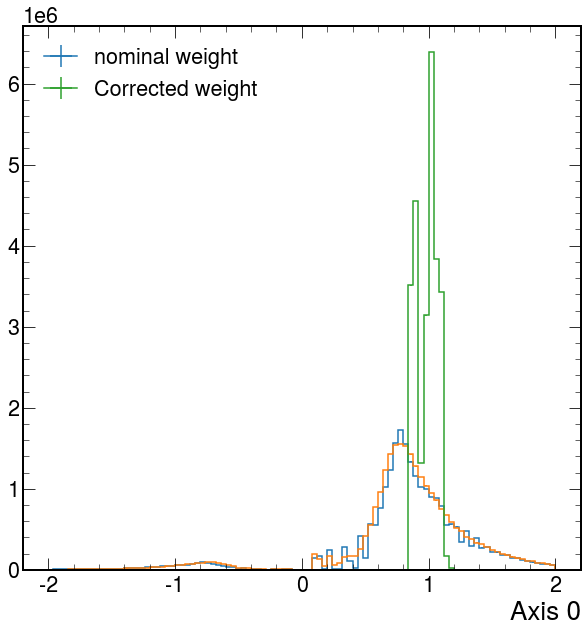

In [193]:
out["ZmumuPostVFP"]["output"]["weight_uncorr"].plot(label="nominal weight")
out["ZmumuPostVFP"]["output"]["weight"].plot()
old.plot(label="Corrected weight")
plt.legend()

In [ ]:
out["ZmumuPostVFP"]["output"]["weight"].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9f5c8d5de0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

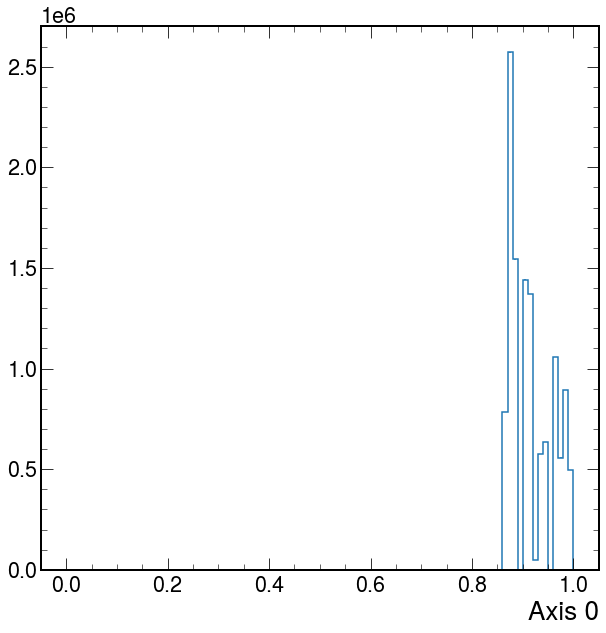

In [78]:
out["ZmumuPostVFP"]["output"]["corrWeight"].plot()

In [80]:
out["ZmumuPostVFP"]["output"].keys()

dict_keys(['dilepton', 'dilepton_uncorr', 'tensorSize', 'corrWeight', 'scetlibCorr', 'nominal', 'effStatTnP', 'effSystTnP', 'muonL1PrefireStat', 'muonL1PrefireSyst', 'nominal_uncorr', 'qcdScale', 'qcdScaleByHelicity', 'pdfNNPDF31', 'alphaS002pdfNNPDF31', 'massWeight', 'muonScaleSyst', 'muonScaleSyst_responseWeights'])

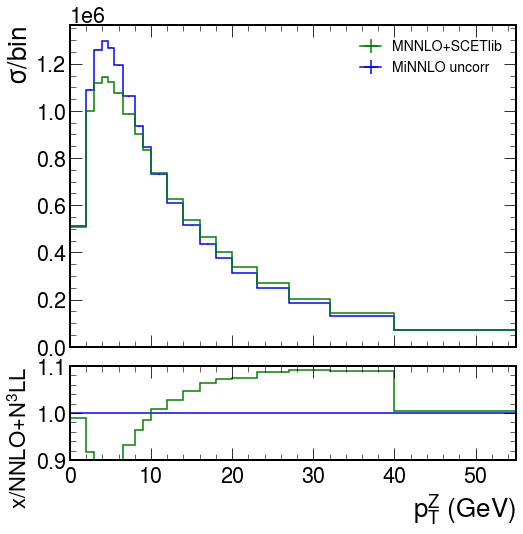

In [195]:
fig = plot_tools.makePlotWithRatioToRef([out["ZmumuPostVFP"]["output"]["dilepton_uncorr"].project("ptll"), out["ZmumuPostVFP"]["output"]["dilepton"].project("ptll"), ], colors=["blue", "green", ], labels=["MiNNLO uncorr", "MNNLO+SCETlib", ], rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNLO+N$^{3}$LL", nlegcols=1, binwnorm=True)

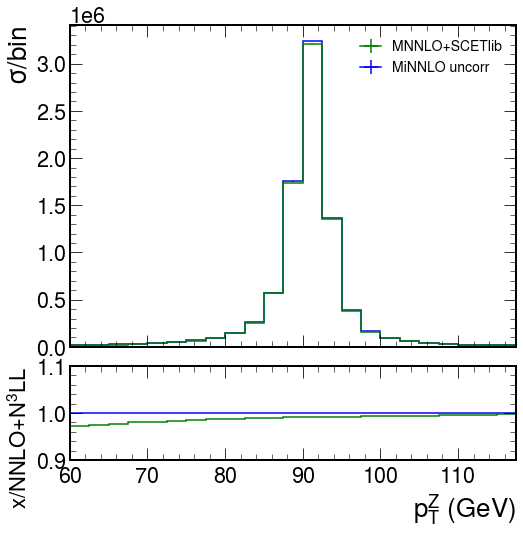

In [197]:
fig = plot_tools.makePlotWithRatioToRef([out["ZmumuPostVFP"]["output"]["dilepton_uncorr"].project("mll"), out["ZmumuPostVFP"]["output"]["dilepton"].project("mll"), ], colors=["blue", "green", ], labels=["MiNNLO uncorr", "MNNLO+SCETlib", ], rrange=[0.9, 1.1,], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNLO+N$^{3}$LL", nlegcols=1, binwnorm=True)


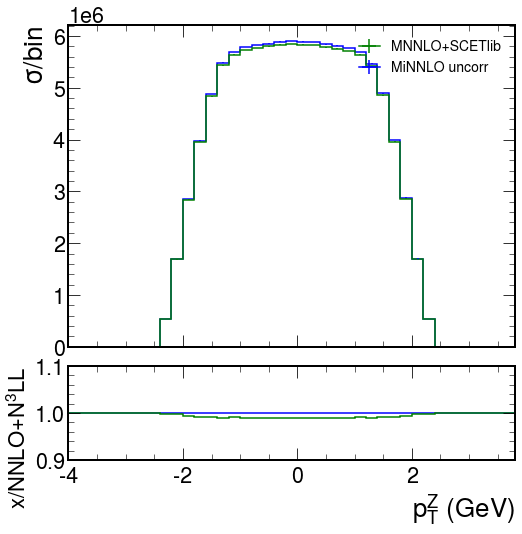

In [199]:
fig = plot_tools.makePlotWithRatioToRef([out["ZmumuPostVFP"]["output"]["dilepton_uncorr"].project("yll"), out["ZmumuPostVFP"]["output"]["dilepton"].project("yll"), ], colors=["blue", "green", ], labels=["MiNNLO uncorr", "MNNLO+SCETlib", ], rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNLO+N$^{3}$LL", nlegcols=1, binwnorm=True)

In [169]:
from wremnants import scetlib_corrections

In [172]:
corr = scetlib_corrections.make_corr_helper(isW=False)

Shape is (1, 5, 40, 1, 1)
